# **셋째마당. 실전! 데이터 분석 프로젝트**

## 파이썬 운영환경을 사전에 기본 점검하기

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

### import os 명령을 통하여 os안에 있는 기본명령을 사용할 수가 있다.  
- 기본 os 명령을 사용하려면 <font color='blue'>**import os**</font>명령을 사용한다.  
- *os.* 상태에서 **<탭>키**를 쳐서 부속된 속성(attribute)을 확인할 수가 있다.   
- **작업디렉토리변경(chdir), 작업디렉토리생성(mkdir)** 등 기본적인 작업이 가능하다.    
- 파이썬은 디렉토리(폴더) 주소를 판별할 때에 \은 \\로 나타내야 하고 /는 그냥 한개만 사용하면 된다.  
  - 따라서 리눅스와 파일을 주고받아야 할 경우 경로를 /로 표시해 두는 것이 좋다.  

In [1]:
import os   # OS 명령을 기본 사용하기 위한 라이브러리  

os.getcwd()   # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data'

In [2]:
os.chdir('../python_Data/data')   # 상대경로 이동 

os.getcwd()           # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data\\data'

### 파이썬 기본 경고메세지 처리(무시 OR 기본값) 하기

In [104]:
import warnings     # 파이썬 기본적인 경고메세지 처리하기     

warnings.filterwarnings(action='ignore')      # 기본적인 경고메세지 무시하기 
# warnings.filterwarnings(action='default')    # 기본적인 경고메세지 기본값으로 표시하기   

### 이 책에서 사용하는 소프트웨어 버전 

In [4]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__) 

import seaborn as sns  
print("Seaborn 버전:", sns.__version__) 


Python 버전: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 2.1.1
matplotlib 버전: 3.7.2
NumPy 버전: 1.24.3
Seaborn 버전: 0.12.2


# 09 데이터 분석 프로젝트  - 한국인의 삶을 파악하라!

## 09-1 '한국복지패널 데이터' 분석 준비하기
- 한국보건사회연구원 발간 조사 자료
- 전국 7,000여 가구 선정, 2006년부터 매년 추적 조사한 자료
- 경제활동, 생활실태, 복지욕구 등 천여 개 변수로 구성됨
- 다양한 분야의 연구자, 정책전문가들이 활용함
- 엄밀한 절차로 수집되고 다양한 변수가 있으므로 데이터 분석 연습하기 좋은 재료

### 데이터 분석 준비하기

#### 1. 데이터 준비하기
- Koweps_hpwc14_2019_beta2.sav 파일을 워킹 디렉터리에 삽입
- 2020년 발간 복지패널 데이터. 6,331가구, 14,418명의 정보를 담고 있음
- Koweps_Codebook_2019.xls

#### 2. 패키지 설치 및 로드하기
- sav: 통계 분석 소프트웨어 SPSS 전용 파일
- pyreadstat 패키지 설치하면 pandas 패키지를 이용해 불러올 수 있음

In [ ]:
#!pip install pyreadstat

pip install pyreadstat

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 3. 데이터 불러오기

In [29]:
# 데이터 불러오기
raw_welfare = pd.read_spss('../data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 
welfare = raw_welfare.copy()

#### 4. 데이터 검토하기

In [30]:
welfare             # 앞부분, 뒷부분 출력

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [31]:
welfare.shape       # 행, 열 개수 출력

(14418, 830)

In [32]:
welfare.info()      # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [33]:
welfare.describe()  # 요약 통계량

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


#### 5. 변수명 바꾸기

In [34]:
welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

### 데이터 분석 절차 
 -1. 변수 검토 및 전처리<br>
 -2. 변수간 관계 분석

## 09-2 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 성별 변수 검토 및 전처리하기
 - 여성들의 사회 진출이 두드러지지만, 여전히 직장에서 차별적인 대우를 받고 있습니다.
 - 먼저 성별과 월급 두 변수를 검토하고, 전처리한 다음 변수간의 관계를 분석합니다.
 - 분석 절차 : 성별, 월급
 - 변수간 관계분석: 성별 월급 평균표 만들기, 그래프 만들기  

#### 1. 변수 검토하기

In [35]:
print(welfare['sex'])
welfare['sex'].dtypes  # 변수 타입 출력

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64


dtype('float64')

In [36]:
welfare['sex'].value_counts()  # 빈도 구하기, 1은 남성, 2는 여성.

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

#### 2. 전처리하기

In [37]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [38]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

In [39]:
# 결측치 확인
welfare['sex'].isna().sum()

0

In [40]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
welfare['sex']

0        female
1          male
2          male
3          male
4        female
          ...  
14413    female
14414    female
14415      male
14416    female
14417      male
Name: sex, Length: 14418, dtype: object

In [41]:
# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

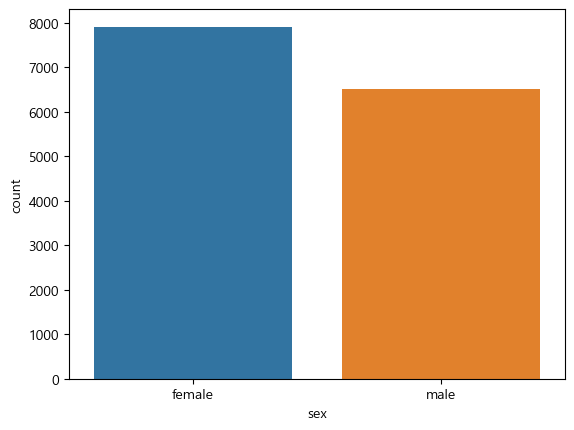

In [105]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'sex')

### 월급 변수 검토 및 전처리하기

#### 1. 변수 검토하기
 - income : 월급 변수

In [46]:
welfare['income'].dtypes  # 변수 타입 출력

dtype('float64')

In [47]:
welfare['income'].describe()  # 요약 통계량 구하기

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

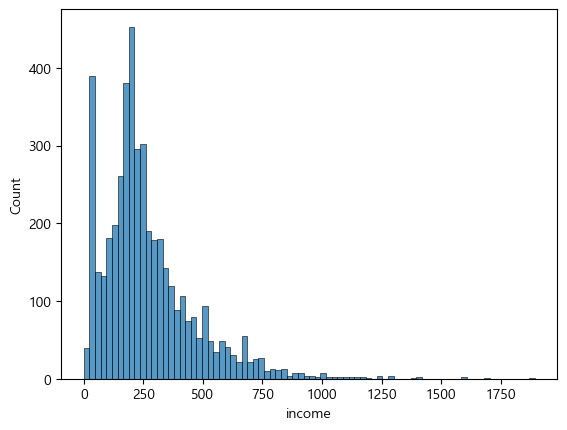

In [106]:
sns.histplot(data = welfare, x = 'income')  # 히스토그램 만들기

#### 2. 전처리하기
- 문항내용: 민원, 모름/무응답: 9999

In [51]:
welfare['income'].describe()  # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [54]:
pd.set_option('display.max_rows', None)     # 모든 행 출력하도록 설정

In [55]:
welfare['income'].isna().sum()  # 결측치 확인
welfare['income']

0           NaN
1           NaN
2         107.0
3         192.0
4           NaN
5           NaN
6           NaN
7          27.0
8          27.0
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14        338.0
15        200.0
16          NaN
17          NaN
18          NaN
19        110.0
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25        113.0
26        315.0
27        200.0
28        148.0
29        158.0
30        238.0
31        156.0
32          NaN
33          NaN
34          NaN
35          NaN
36          NaN
37          NaN
38          NaN
39          NaN
40        583.0
41          NaN
42          NaN
43        239.0
44        250.0
45          NaN
46        258.0
47          NaN
48          NaN
49          NaN
50          NaN
51        219.0
52          NaN
53          NaN
54        260.0
55          NaN
56          NaN
57          NaN
58        238.0
59          NaN
60        278.0
61          NaN
62      

In [56]:
pd.reset_option('display.max_rows')     # 행 출력 제한 되돌리기

In [61]:
# 이상치 결측 처리, 문항내용: 민원, 모름/무응답: 9999
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

### 성별에 따른 월급 차이 분석하기

#### 1. 성별 월급 평균표 만들기

In [62]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


#### 2. 그래프 만들기

<Axes: xlabel='sex', ylabel='mean_income'>

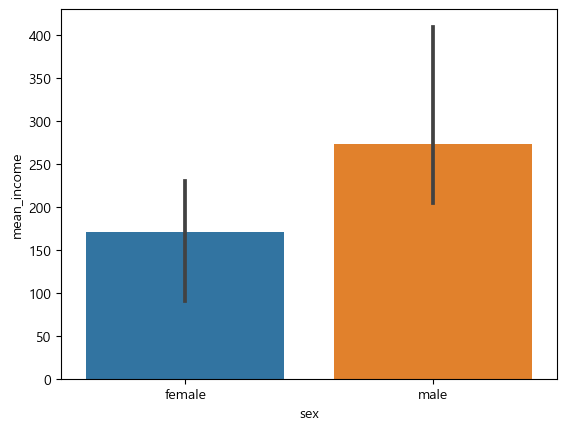

In [107]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')  

## 09-3 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?
- 비정규직, 세대간 소득 격차로 사회적 불평등 초래

### 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [64]:
welfare['birth'].dtypes  # 변수 타입 출력

dtype('float64')

In [65]:
welfare['birth'].describe()  # 요약 통계량 구하기

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

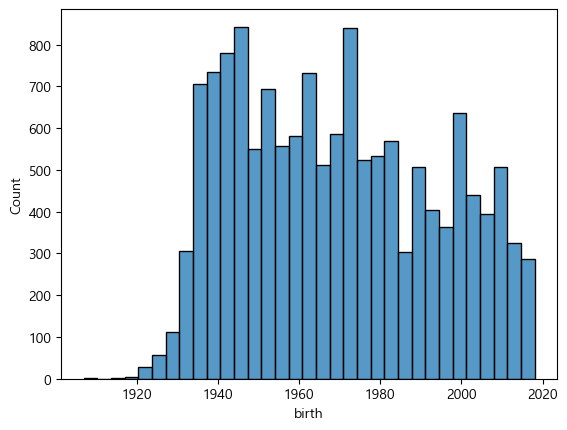

In [108]:
sns.histplot(data = welfare, x = 'birth')  # 히스토그램 만들기

#### 2. 전처리하기

In [67]:
welfare['birth'].describe()  # 이상치 확인

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [68]:
welfare['birth'].isna().sum()  # 결측치 확인

0

In [69]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

# 결측치 확인
welfare['birth'].isna().sum()

0

#### 3. 파생변수 만들기 - 나이

In [70]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)  # 나이 변수 만들기
welfare['age'].describe()                                    # 요약 통계량 구하기

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

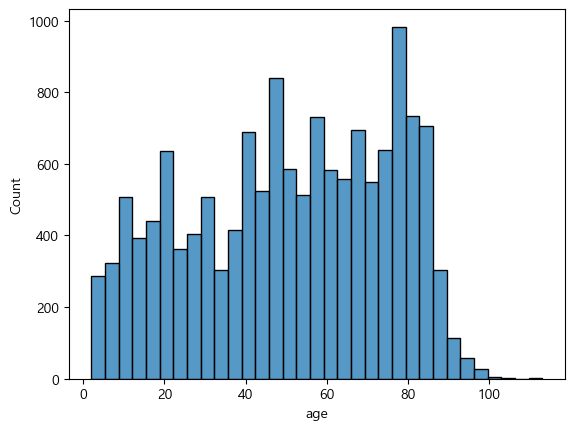

In [109]:
sns.histplot(data = welfare, x = 'age')  # 히스토그램 만들기

### 나이와 월급의 관계 분석하기

#### 1. 나이에 따른 월급 평균표 만들기

In [156]:
## 나이별 월급 평균표 만들기

# income 결측치 제거
# age별 분리
# income 평균 구하기
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


#### 2.  그래프 만들기

<Axes: xlabel='age', ylabel='mean_income'>

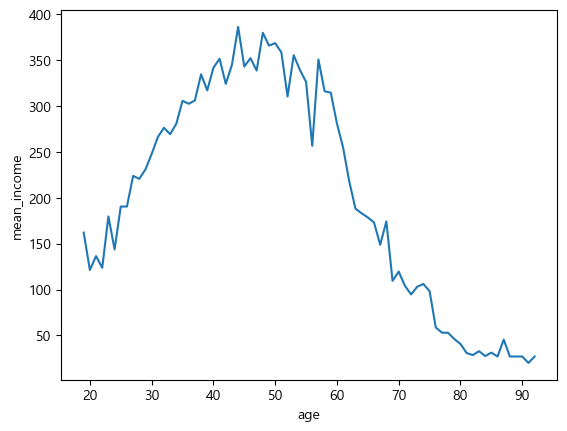

In [110]:
# 선 그래프 만들기
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')  

## 09-4 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

### 연령대 변수 검토 및 전처리하기

#### 파생변수 만들기 - 연령대


In [74]:
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [75]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

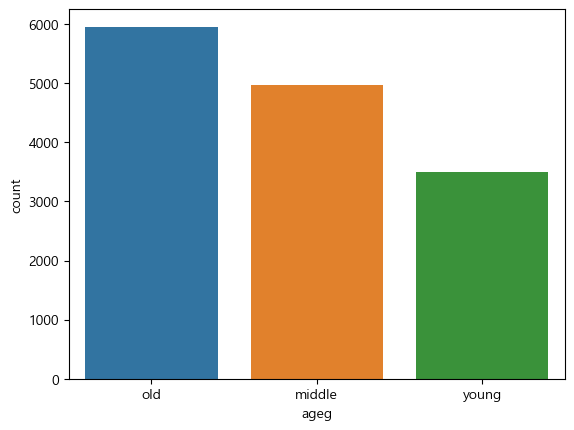

In [111]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg')

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [77]:
## 연령대별 월급 평균표 만들기

# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


#### 2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

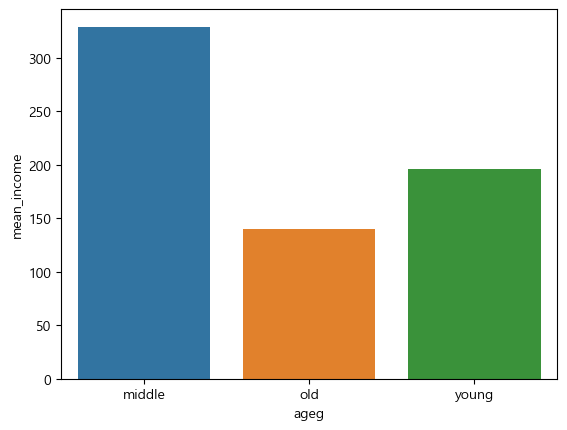

In [112]:
# 막대 그래프 만들기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

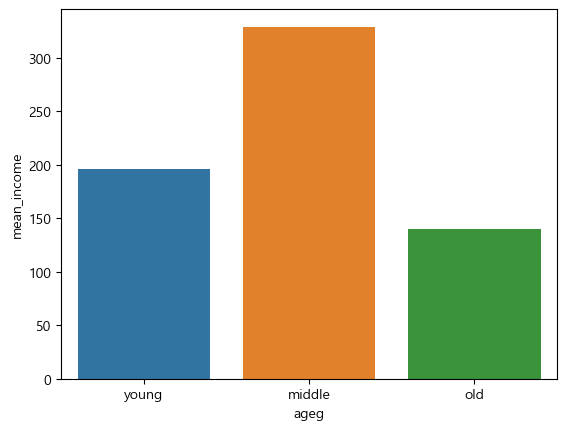

In [113]:
# 막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

## 09-5 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [80]:
## 연령대 및 성별 평균표 만들기

# income 결측치 제거
# ageg 및 sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


#### 2. 그래프 만들기

<Axes: xlabel='ageg', ylabel='mean_income'>

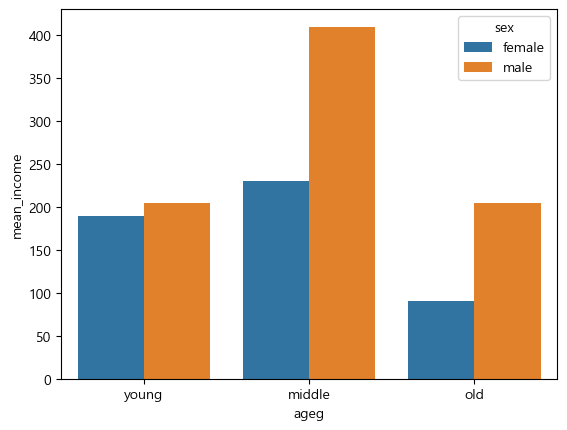

In [114]:
# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

### 나이 및 성별 월급 차이 분석하기

In [82]:
## 나이 및 성별 월급 평균표 만들기

# income 결측치 제거
# age 및 sex별 분리
# income 평균 구하기
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

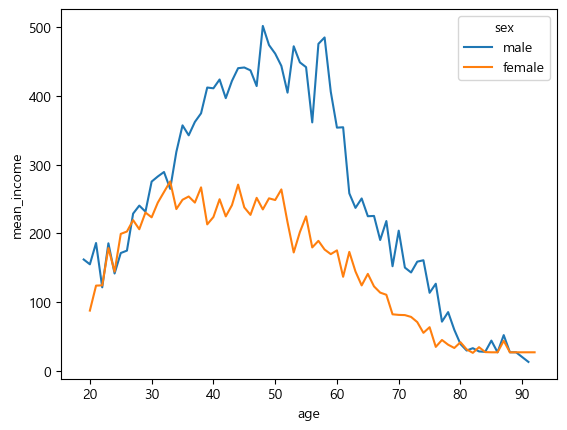

In [115]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 09-6 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 직업 변수 검토 및 전처리하기

#### 1. 변수 검토하기
 - code_job : 직업 코드

In [84]:
welfare['code_job'].dtypes  # 변수 타입 출력

dtype('float64')

In [85]:
welfare['code_job'].value_counts()  # 빈도 구하기

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

#### 2. 전처리하기

In [88]:
list_job = pd.read_excel('../data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [89]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [93]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')
welfare 

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5,age,ageg,job_x,job_y,job
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,NaN,NaN,0.0,NaN,75.0,old,NaN,NaN,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,NaN,NaN,0.0,NaN,72.0,old,NaN,NaN,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,1284.0,NaN,0.0,NaN,78.0,old,전기공,전기공,전기공
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,2304.0,NaN,1800.0,0.0,NaN,58.0,middle,금속기계 부품 조립원,금속기계 부품 조립원,금속기계 부품 조립원
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,NaN,NaN,NaN,0.0,NaN,57.0,middle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,53.0,middle,NaN,NaN,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,28.0,young,NaN,NaN,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,208.0,NaN,0.0,NaN,25.0,young,건설 및 광업 단순 종사자,건설 및 광업 단순 종사자,건설 및 광업 단순 종사자
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1200.0,NaN,0.0,NaN,22.0,young,보건 의료 관련 종사자,보건 의료 관련 종사자,보건 의료 관련 종사자


In [94]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [157]:
## 직업별 월급 평균표 만들기

# job, income 결측치 제거
# job별 분리
# income 평균 구하기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


#### 3. 그래프 만들기

**(1) 월급이 많은 직업**

In [96]:
# 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [97]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

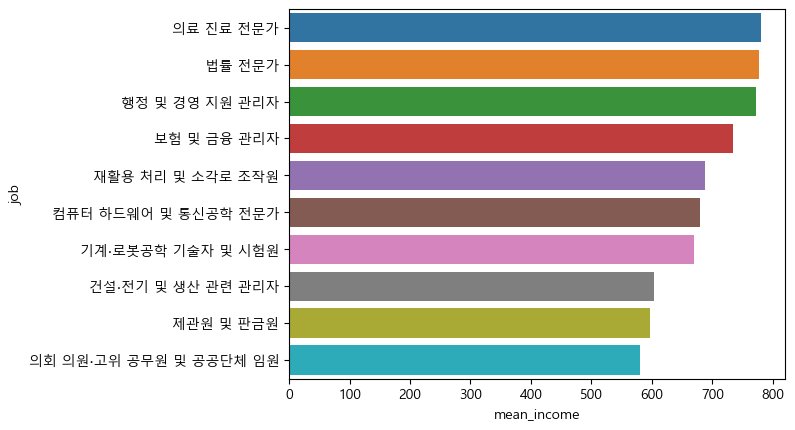

In [116]:
# 막대 그래프 만들기
sns.barplot(data = top10, y = 'job', x = 'mean_income')

**(2) 월급이 적은 직업**

In [117]:
# 하위 10위 추출
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

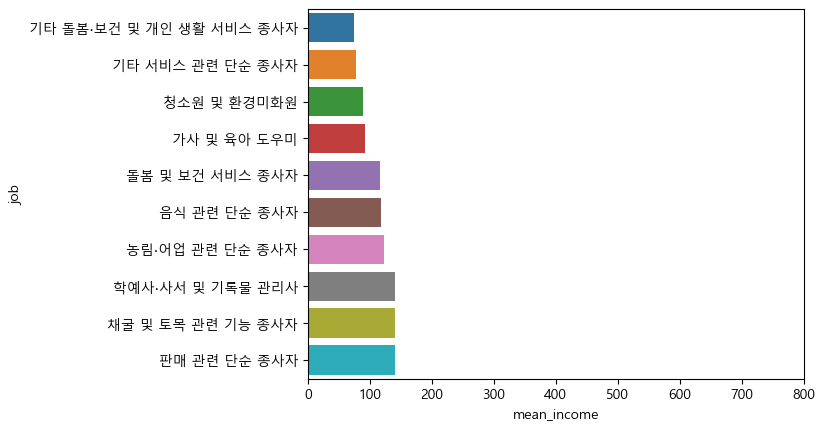

In [118]:
# 막대 그래프 만들기
sns.barplot(data = bottom10, y = 'job', x = 'mean_income') \
   .set(xlim = [0, 800])

## 09-7 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
- 분석절차 
- 변수 검토 및 전처리 : 1.성별,  2.직업
- 변수간 관계분석 : 1.성별직업 빈도표 만들기 2.그래프 생성

### 성별 직업 빈도 분석하기

#### 1. 성별 직업 빈도표 만들기

In [119]:
## 남성 직업 빈도 상위 10개 추출

# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [120]:
## 여성 직업 빈도 상위 10개 추출

# job 결측치 제거
# female 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


#### 2. 그래프 만들기

[(0.0, 500.0)]

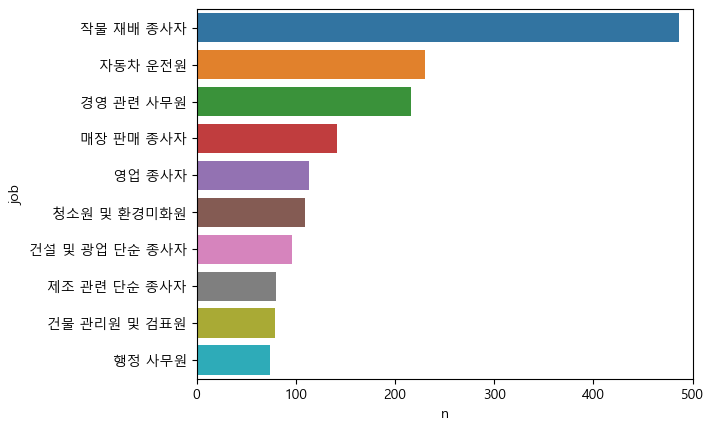

In [121]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

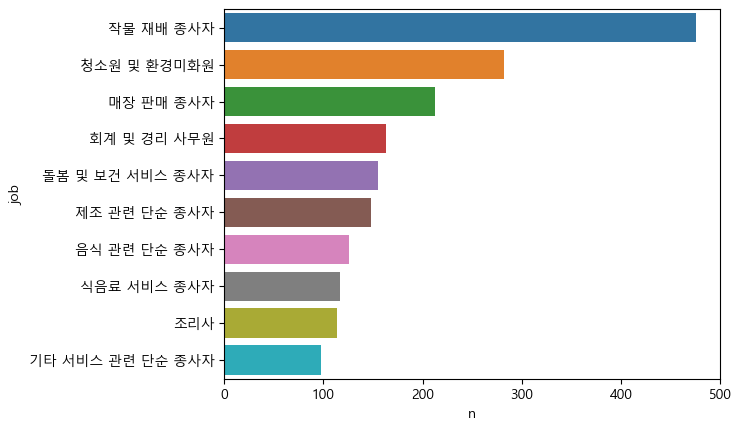

In [122]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

## 09-8 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?
- 분석절차 
- 변수 검토 및 전처리 : 1.종교,  2.혼인상태
- 변수간 관계분석 : 1.종교 유무에 따른 이혼율표 만들기 2.그래프 생성

### 종교 변수 검토 및 전처리하기

#### 1. 변수 검토하기
- religion : 종교 유무

In [123]:
welfare['religion'].dtypes  # 변수 타입 출력

dtype('float64')

In [124]:
welfare['religion'].value_counts()  # 빈도 구하기

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

#### 2. 전처리하기

In [125]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

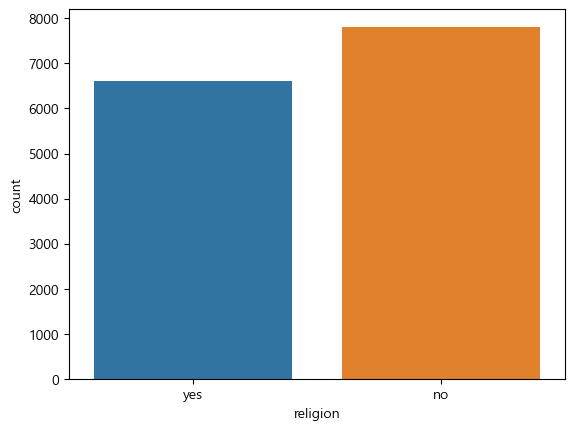

In [126]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x = 'religion')

### 혼인 상태 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [127]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [128]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

#### 2. 파생변수 만들기 - 이혼 여부

In [129]:
# 0.비해당(18세 미만), 1.유배우 2.사별 3.이혼 4.별거 5.미혼(18세이상, 미혼모 포함)  6.기타(사망 등)
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [130]:
## 이혼 여부별 빈도

# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

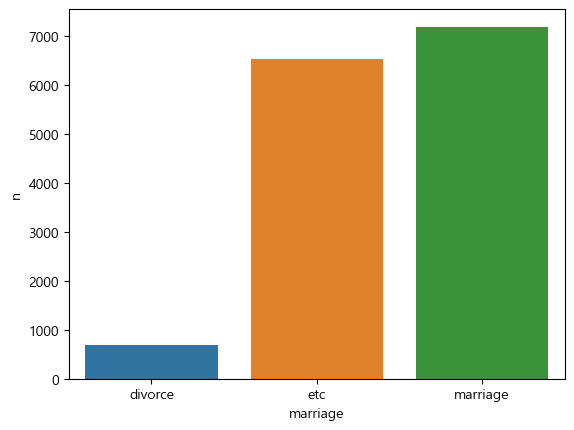

In [131]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

### 종교 유무에 따른 이혼율 분석하기

#### 1. 종교 유무에 따른 이혼율표 만들기

In [132]:
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


#### 2. 그래프 만들기

In [133]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

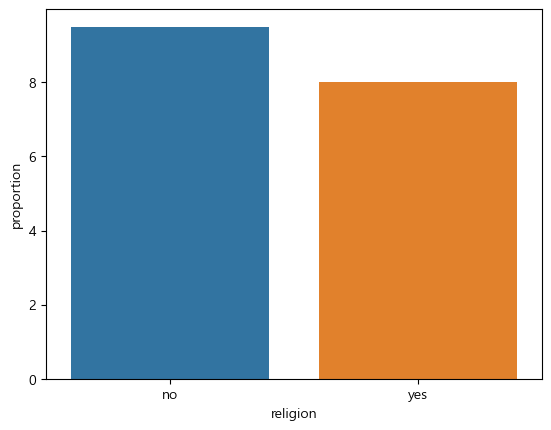

In [134]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석하기

#### 1. 연령대별 이혼율표 만들기

In [135]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [136]:
## 연령대 및 이혼 여부별 빈도

# etc 제외
# ageg별 분리
# marriage 추출
# 빈도 구하기
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


#### 2. 연령대별 이혼율 그래프 만들기

In [137]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

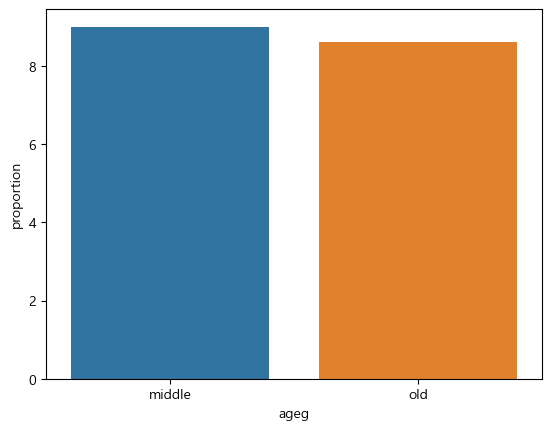

In [138]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

#### 3. 연령대 및 종교 유무에 따른 이혼율표 만들기

In [139]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


#### 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기

In [140]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

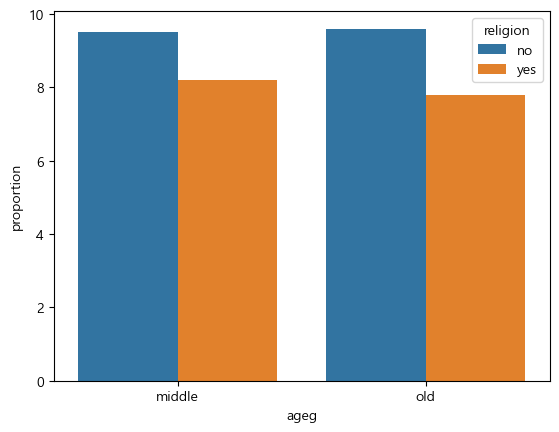

In [141]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 09-9 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?
- 분석절차 
- 변수 검토 및 전처리 : 1.지역,  2.연령대
- 변수간 관계분석 : 1.지역별 연령대 비율표 만들기 2.그래프 생성

### 지역 변수 검토 및 전처리하기
- code_region : 지역

#### 1. 변수 검토하기

In [159]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [160]:
# 1.서울 2.수도권(인천/경기)  3.부산/경남/울산  4.대구/경북  
# 5.대전/충남  6.강원/충북  7.광주/전남/전북/제주도 

welfare['code_region'].value_counts()  # 빈도 구하기

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

#### 2. 전처리하기


In [161]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [162]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']]

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울
...,...,...
14413,5.0,대전/충남
14414,5.0,대전/충남
14415,5.0,대전/충남
14416,5.0,대전/충남


### 지역별 연령대 비율 분석하기

#### 1. 지역별 연령대 비율표 만들기

In [163]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


#### 2. 그래프 만들기

In [164]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

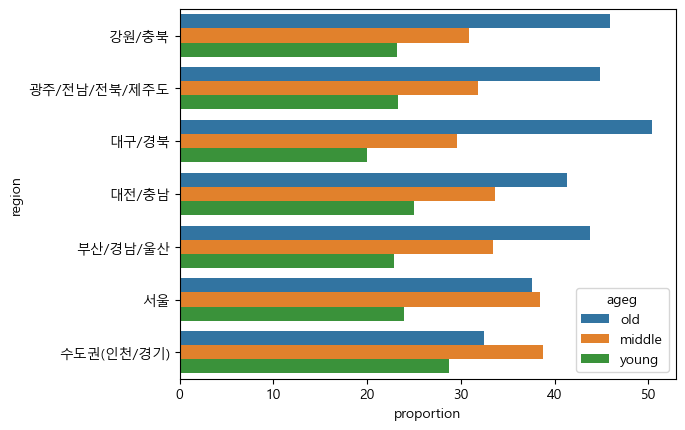

In [150]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

#### 3. 누적 비율 막대 그래프 만들기
- 각 지역의 연령대별 비율이 서로 다른 막대로 되어 있어서 지역끼리 비교가 쉽도록 연령대별 막대를 누적한 것으로 그래프 만들기
- 피벗하기 : 행과열을 바꿔서 작업하는 것.

**(1) 피벗하기**

In [151]:
# 피벗
# index   = 'region' : 지역 기준으호 회전, 
#  columns = 'ageg' : 연령대별 열 구성,
#   values  = 'proportion' : 각 항목 값을 비율로 나나냄.

pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


**(2) 그래프 만들기**

<Axes: ylabel='region'>

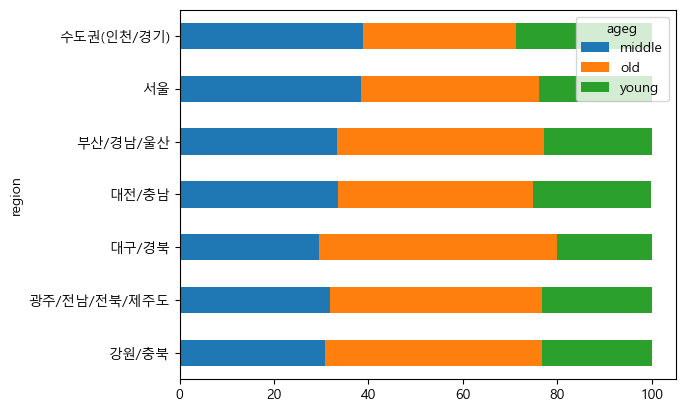

In [152]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)

**(3) 막대 정렬하기**

In [153]:
# 노년층 비율이 높은 순으로 막대 정렬하기

reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

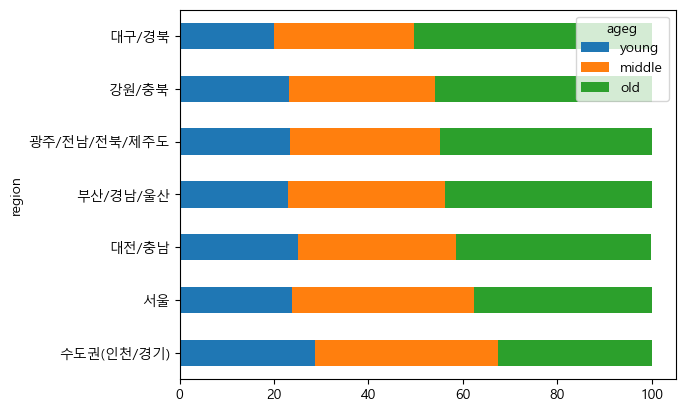

In [154]:
# 누적 가로 막대 그래프 만들기 => 연령대 순으로 막대 색상 순서 바꾸기(초년, 중년, 노년)
reorder_df.plot.barh(stacked = True)